In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train_strict_domain.csv')
test_df = pd.read_csv('test_strict_domain.csv')
val_df = pd.read_csv('val_strict_domain.csv')

# Display the first few rows of each DataFrame
print("Train DataFrame:")
display(train_df.head())

print("\nTest DataFrame:")
display(test_df.head())

print("\nValidation DataFrame:")
display(val_df.head())

Train DataFrame:


,text,label_raw,label,source
0,दोघांचं लग्न ठरतं आणि इथूनच कथेला वळण येतं,0,neutral,MR
1,- जा आणि त्याला घेऊन जा!,0,neutral,MS
2,पण योग्य विपणन दिले ... ... आम्ही थँक्सगिव्हिं...,1,positive,MS
3,उत्तम सिनेमॅटोग्राफीसिरीजमधील आणखी एक महत्त्वा...,0,neutral,MR
4,आमच्या भविष्यात तुम्हाला मुले दिसत नाहीत का?,0,neutral,MS



Test DataFrame:


,text,label_raw,label,source
0,"भयपट म्हटले की ठरावीक पद्धतीची कथा, मांडणी या ...",-1,negative,MR
1,आपण पूर्णपणे सांगू शकता!,0,neutral,MS
2,तेव्हा तो संतापतो,-1,negative,MR
3,पण त्यात तो अनुत्तीर्ण होतो,-1,negative,MR
4,त्यामुळे भगवानदासचा ब्राह्मण असण्याचा गर्व आणि...,1,positive,MR



Validation DataFrame:


,text,label_raw,label,source
0,"आपण या मुलाच्या पूर्णपणे प्रेमात होता जो, समलि...",0,neutral,MS
1,जर तो एक स्त्री असता तर.,0,neutral,MS
2,तात्या गावातील विविधांगी समस्यांचा सुवर्णमध्य ...,1,positive,MR
3,"चला, आम्ही एकत्र छान आहोत.",1,positive,MS
4,आम्हाला एक समस्या.,-1,negative,MS


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Define parameters
vocab_size = 25000  # Increased vocabulary size
max_length = 100  # Adjusted max length
embedding_dim = 100
lstm_units = 64
epochs = 10
batch_size = 32

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# Fit the tokenizer on the training data text
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])

# Pad sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')

# Prepare labels (convert to numerical and then one-hot encode)
# Assuming labels are 'positive', 'negative', 'neutral'
label_map = {'positive': 0, 'negative': 1, 'neutral': 2}
train_labels = train_df['label'].map(label_map)
test_labels = test_df['label'].map(label_map)
val_labels = val_df['label'].map(label_map)

train_labels_encoded = to_categorical(train_labels, num_classes=3)
test_labels_encoded = to_categorical(test_labels, num_classes=3)
val_labels_encoded = to_categorical(val_labels, num_classes=3)

print("Data preprocessing complete.")
print("Shape of training data:", train_padded.shape)
print("Shape of training labels:", train_labels_encoded.shape)
print("Shape of test data:", test_padded.shape)
print("Shape of test labels:", test_labels_encoded.shape)
print("Shape of validation data:", val_padded.shape)
print("Shape of validation labels:", val_labels_encoded.shape)

Data preprocessing complete.
Shape of training data: (21000, 100)
Shape of training labels: (21000, 3)
Shape of test data: (4500, 100)
Shape of test labels: (4500, 3)
Shape of validation data: (4500, 100)
Shape of validation labels: (4500, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Build the Bidirectional LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(lstm_units, return_sequences=True)),
    Bidirectional(LSTM(lstm_units)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: positive, negative, neutral
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(train_padded, train_labels_encoded,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(val_padded, val_labels_encoded),
                    verbose=1)

print("Model training complete.")

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.4716 - loss: 0.9931 - val_accuracy: 0.6727 - val_loss: 0.7478
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7860 - loss: 0.5488 - val_accuracy: 0.6864 - val_loss: 0.7758
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8788 - loss: 0.3332 - val_accuracy: 0.6873 - val_loss: 0.9186
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9209 - loss: 0.2185 - val_accuracy: 0.6631 - val_loss: 1.0517
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9426 - loss: 0.1593 - val_accuracy: 0.6596 - val_loss: 1.3623
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9537 - loss: 0.1228 - val_accuracy: 0.6698 - val_loss: 1.3655
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9600 - loss: 0.1029 - val_accuracy: 0.6653 - val_loss: 1.7217
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9684 - loss: 0.0842 - 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_padded, test_labels_encoded, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 2.3083
Test Accuracy: 0.6460


In [ ]:
# Predict sentiment on the test data
predictions = model.predict(test_padded)

# Convert predictions to sentiment labels
predicted_labels = np.argmax(predictions, axis=1)

# Map numerical labels back to sentiment strings
reverse_label_map = {0: 'positive', 1: 'negative', 2: 'neutral'}
predicted_sentiment = [reverse_label_map[label] for label in predicted_labels]

# Add predicted sentiment to the test_df
test_df['predicted_label'] = predicted_sentiment

print("Sentiment prediction complete.")
display(test_df.head())

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Sentiment prediction complete.


,text,label_raw,label,source,predicted_label
0,"भयपट म्हटले की ठरावीक पद्धतीची कथा, मांडणी या ...",-1,negative,MR,neutral
1,आपण पूर्णपणे सांगू शकता!,0,neutral,MS,negative
2,तेव्हा तो संतापतो,-1,negative,MR,neutral
3,पण त्यात तो अनुत्तीर्ण होतो,-1,negative,MR,neutral
4,त्यामुळे भगवानदासचा ब्राह्मण असण्याचा गर्व आणि...,1,positive,MR,negative


In [ ]:
# Separate reviews by predicted sentiment
positive_reviews = test_df[test_df['predicted_label'] == 'positive']['text'].str.cat(sep=' ')
negative_reviews = test_df[test_df['predicted_label'] == 'negative']['text'].str.cat(sep=' ')
neutral_reviews = test_df[test_df['predicted_label'] == 'neutral']['text'].str.cat(sep=' ')

print("Reviews separated by predicted sentiment.")

Reviews separated by predicted sentiment.


In [ ]:
!pip install wordcloud matplotlib

Font already exists.


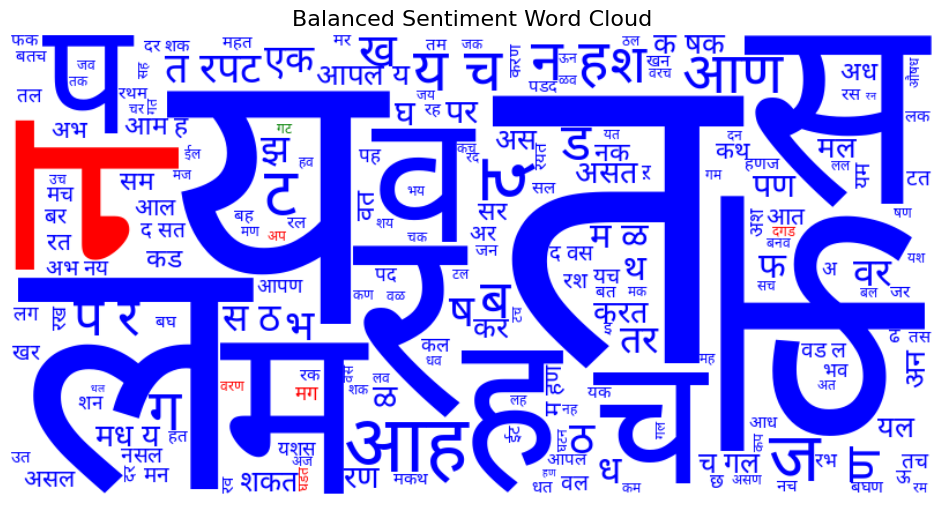

Balanced word cloud generated with equal contribution from positive, negative, and neutral words.


In [ ]:
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import requests

# Step 1: Download Devanagari font if not present
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf"
font_path = "NotoSansDevanagari-Regular.ttf"

if not os.path.exists(font_path):
    print(f"Downloading font from {font_url}...")
    response = requests.get(font_url)
    response.raise_for_status()
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print("Font downloaded successfully.")
else:
    print("Font already exists.")

# Step 2: Balance words from each sentiment
def balance_text(pos_text, neg_text, neu_text, max_words=500):
    pos_words = pos_text.split()
    neg_words = neg_text.split()
    neu_words = neu_text.split()

    # Find minimum length among them
    min_len = min(len(pos_words), len(neg_words), len(neu_words), max_words)

    # Randomly sample equal number of words from each class
    pos_sample = random.sample(pos_words, min_len)
    neg_sample = random.sample(neg_words, min_len)
    neu_sample = random.sample(neu_words, min_len)

    # Return balanced combined text
    return " ".join(pos_sample + neg_sample + neu_sample), pos_sample, neg_sample, neu_sample

# Assume you already have strings: positive_reviews, negative_reviews, neutral_reviews
all_reviews, pos_sample, neg_sample, neu_sample = balance_text(positive_reviews, negative_reviews, neutral_reviews)

# Step 3: Map words to sentiment for coloring
word_sentiment = {}
for word in pos_sample:
    word_sentiment[word] = 'positive'
for word in neg_sample:
    word_sentiment[word] = 'negative'
for word in neu_sample:
    word_sentiment[word] = 'neutral'

# Step 4: Define coloring function
def color_func(word, **kwargs):
    sentiment = word_sentiment.get(word, 'neutral')
    if sentiment == 'positive':
        return "green"
    elif sentiment == 'negative':
        return "red"
    else:
        return "blue"

# Step 5: Generate balanced word cloud
wordcloud_balanced = WordCloud(width=800, height=400, background_color='white',
                               font_path=font_path, color_func=color_func).generate(all_reviews)

# Step 6: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_balanced, interpolation='bilinear')
plt.axis('off')
plt.title("Balanced Sentiment Word Cloud", fontsize=16)
plt.show()

print("Balanced word cloud generated with equal contribution from positive, negative, and neutral words.")
